# <center>[MNIST]("https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import warnings 
warnings.simplefilter("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Sequential model indicates the flow of the execution.

- The flow of the Execution is from 
  <pre style = "color : red;"> input -> Conv -> Conv -> Maxpool -> Fully Connected -> Fully Connected -> Output </pre>
- Here the dropout indicates the % of the data is not considering

In [2]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
ytrain =  to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

In [4]:
print(f"""
        xtrain shape : {xtrain.shape}
        xtest shape  : {xtest.shape}
        ytrain shape : {ytrain.shape}
        ytest shape  : {ytest.shape}
        ___________________________________________________
        Total records : {xtrain.shape[0] + xtest.shape[0]}
        
        Pixel size : {xtrain.shape[1]},{xtrain.shape[2]}
        
        It contains B\W images where it has Channels : 1
""")


        xtrain shape : (60000, 28, 28)
        xtest shape  : (10000, 28, 28)
        ytrain shape : (60000, 10)
        ytest shape  : (10000, 10)
        ___________________________________________________
        Total records : 70000
        
        Pixel size : 28,28
        
        It contains B\W images where it has Channels : 1



Some Examples

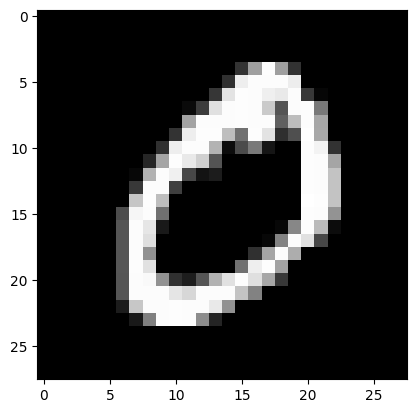

DIGIT  =   0


In [5]:
import matplotlib.pyplot as plt 
plt.imshow(xtrain[1],cmap="gray")
plt.show()
print("DIGIT  =  ",np.argmax(ytrain[1]))

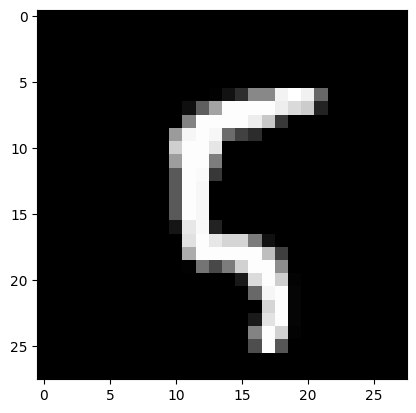

DIGIT  =   5


In [6]:
plt.imshow(xtrain[100],cmap="gray")
plt.show()
print("DIGIT  =  ",np.argmax(ytrain[100]))

In [7]:
xtrain.max()

255

In [8]:
xtrain.min()

0

there is a huge value difference in the values so we require standardization

In [9]:
xtrain = xtrain/255
xtest = xtest/255


In [10]:
xtrain.max()

1.0

In [11]:
xtrain.min()

0.0

Model Building

In [37]:
model = Sequential(
[
    Dense(32, input_shape = (28,28,1)),
    Conv2D(32, kernel_size = (3,3), activation = "relu"),
    Conv2D(32, kernel_size = (3,3), activation = "relu"),
    MaxPooling2D(pool_size = (3,3)),
    Dropout(0.5),
    Flatten(),
    Dense(10,activation = "softmax")
])

model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.summary()
model.fit(xtrain,ytrain, epochs=15, batch_size = 32, validation_data = (xtest,ytest))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 28, 28, 32)        64        
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                      

2023-05-23 16:59:44.591056: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 28s 5ms/step - loss: 0.1934 - accuracy: 0.9392 - val_loss: 0.0515 - val_accuracy: 0.9837
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0805 - accuracy: 0.9751 - val_loss: 0.0446 - val_accuracy: 0.9850
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0589 - accuracy: 0.9814 - val_loss: 0.0345 - val_accuracy: 0.9881
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0530 - accuracy: 0.9832 - val_loss: 0.0339 - val_accuracy: 0.9892
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0312 - val_accuracy: 0.990

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 32)        64        
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        9248      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                        

here total trained parameters are 39k and 0 non-trainable parameters

Epoch 1/15


2023-05-23 16:49:50.006111: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 18s 5ms/step - loss: 0.2040 - accuracy: 0.9362 - val_loss: 0.0577 - val_accuracy: 0.9814
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.0433 - val_accuracy: 0.9858
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0563 - accuracy: 0.9825 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0334 - val_accuracy: 0.9888
E

model is trained with the data and returned 98% accuracy

# Validation

In [38]:
from PIL import Image,ImageOps

In [25]:
import cv2

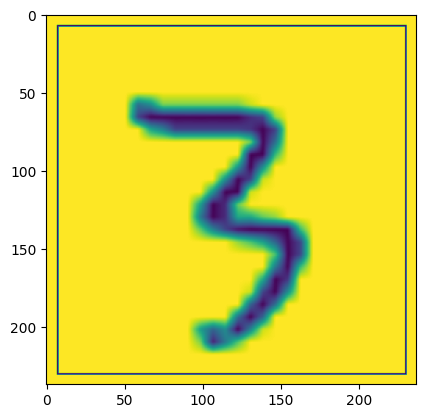

In [39]:
image = Image.open("/kaggle/input/ssssssd/13.png").convert("L")
plt.imshow(image)
image = image.resize((28,28),Image.ANTIALIAS)
img_inverted = ImageOps.invert(image)
img_inverted

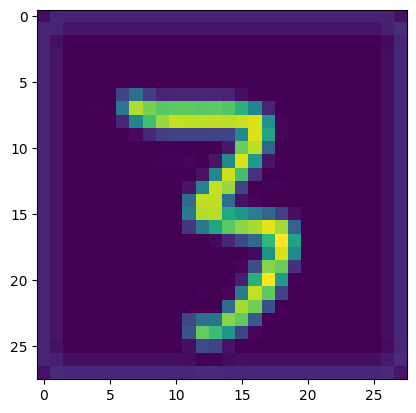

In [40]:
plt.imshow(img_inverted)

In [46]:
model.predict([np.array(img_inverted).reshape(1,28,28,1)])

1/1 [==============================] - 0s 105ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)